In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/medytative/data/master/HR_data_set.csv')
df.rename(columns={'sales':'role'}, inplace=True)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,role,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
sns.set_style('darkgrid')
#sns.set_palette(sns.color_palette('Blues_d'))

## Univariate Data Exploration

There are 0 missing data points



<function matplotlib.pyplot.show>

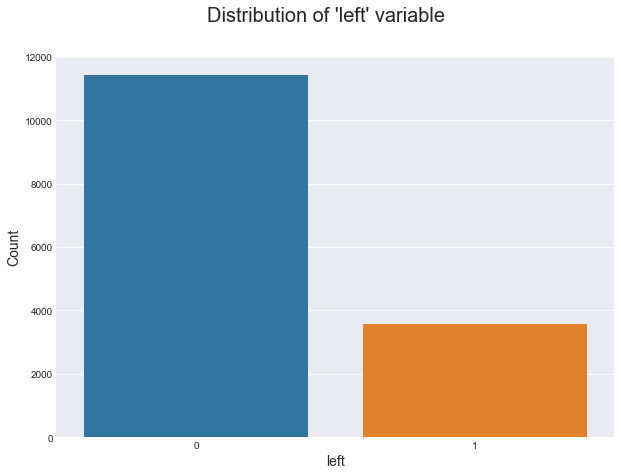

In [4]:
## Exploring outcome variable

## How many null values are there
print('There are {} missing data points\n'.format(len(df[df.left==None])))

## Histogram with counts
f, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='left', data=df)
plt.suptitle('Distribution of \'left\' variable', fontsize=20)
plt.xlabel('left', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show

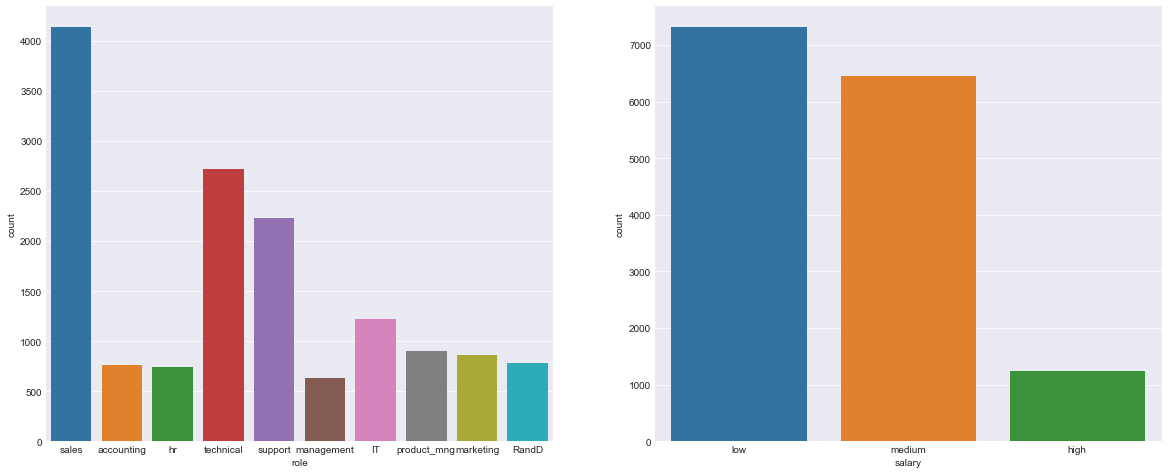

In [5]:
## Exploring categorical variables

## Bar plots

f, ax = plt.subplots(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x='role', data=df)

plt.subplot(1,2,2)
sns.countplot(x='salary', data=df)

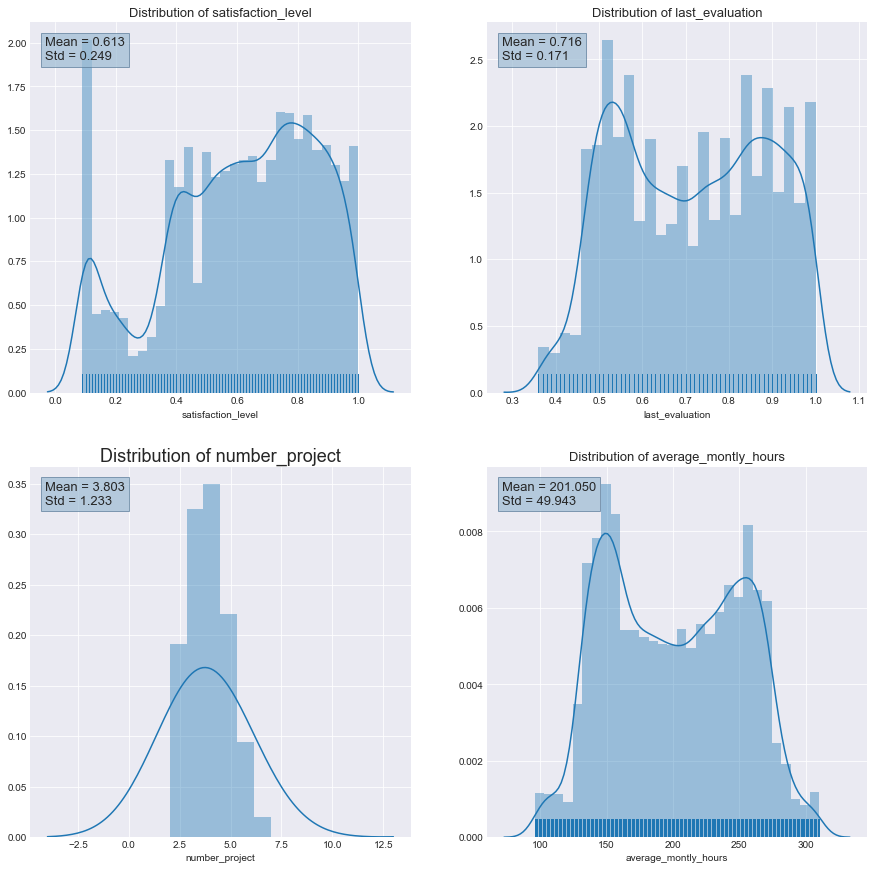

In [6]:
## Exploring continuous variables

## Plotting histograms
f, ax = plt.subplots(figsize=(15,15))

data = [df.satisfaction_level, df.last_evaluation, df.number_project, df.average_montly_hours]
count=0
for data_name in data:
    global count
    ax = plt.subplot(2,2, count+1)
    mean = df.mean()[count]
    std = df.std()[count]
    var_name = df.columns[count]
    if data_name is df.number_project:
        sns.distplot(data_name, bins=6, kde_kws={'bw':2}) #Adjusting bin count & bandwith for discrete variables
        plt.title('Distribution of {}'.format(var_name), fontdict={'fontsize':18})
        plt.text(0.04, .96, 'Mean = {:.3f}\nStd = {:.3f}'.format(mean, std), transform=ax.transAxes, fontsize=13, verticalalignment='top', bbox=dict(alpha=0.7, facecolor='#9dbcd4', edgecolor='#5b7c99', capstyle='butt'))
        count+=1
    else:
        sns.distplot(data_name, rug=True)
        plt.title('Distribution of {}'.format(df.columns[count]), fontdict={'fontsize':13})
        plt.text(0.04, .96, 'Mean = {:.3f}\nStd = {:.3f}'.format(mean, std), transform=ax.transAxes, fontsize=13, verticalalignment='top', bbox=dict(alpha=0.7, facecolor='#9dbcd4', edgecolor='#5b7c99', capstyle='butt'))
        count+=1    

#### Notes:

1) Appears that number of projects follows along a normal distribution

2) No other continuous variables appear to have a normal distribution however

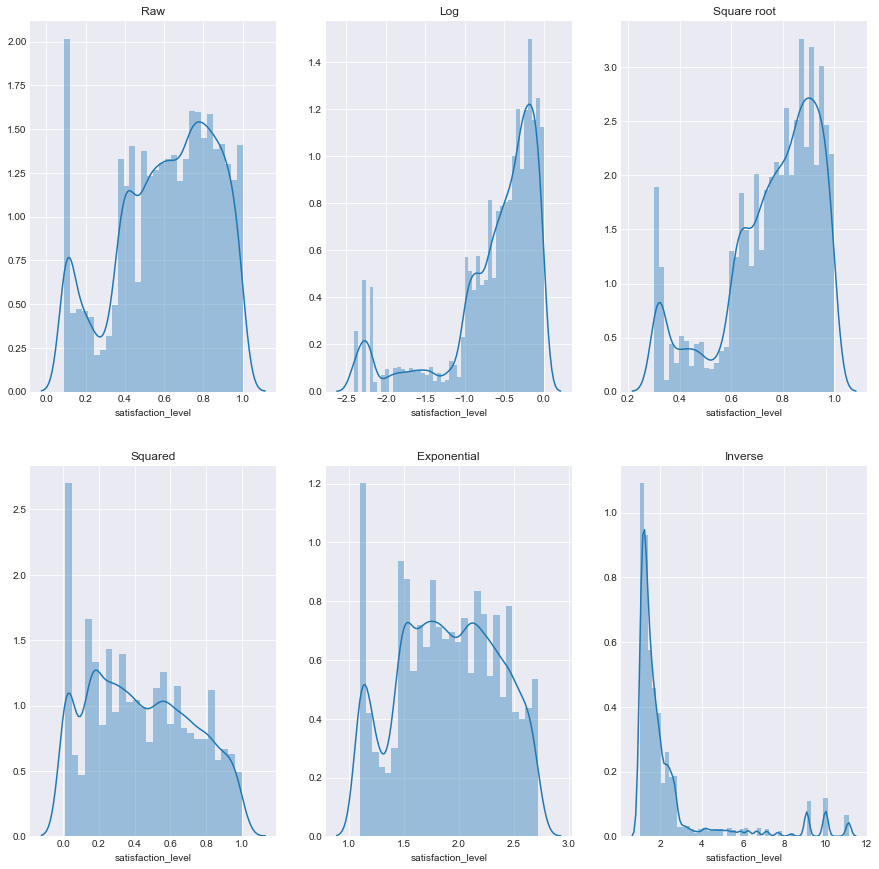

In [7]:
# Let's see if we can create any normal distributions by transforming the data

f, ax = plt.subplots(figsize=(15,15))

plt.subplot(2,3,1)
sns.distplot(df['satisfaction_level'].dropna())
plt.title('Raw')

plt.subplot(2,3,2)
sns.distplot(np.log(df['satisfaction_level'].dropna()))
plt.title('Log')

plt.subplot(2,3,3)
sns.distplot(np.sqrt(df['satisfaction_level'].dropna()))
plt.title('Square root')

plt.subplot(2,3,4)
sns.distplot(np.square(df['satisfaction_level'].dropna()))
plt.title('Squared')

plt.subplot(2,3,5)
sns.distplot(np.exp(df['satisfaction_level'].dropna()))
plt.title('Exponential')

plt.subplot(2,3,6)
sns.distplot(1/df['satisfaction_level'].dropna())
plt.title('Inverse')

plt.show()

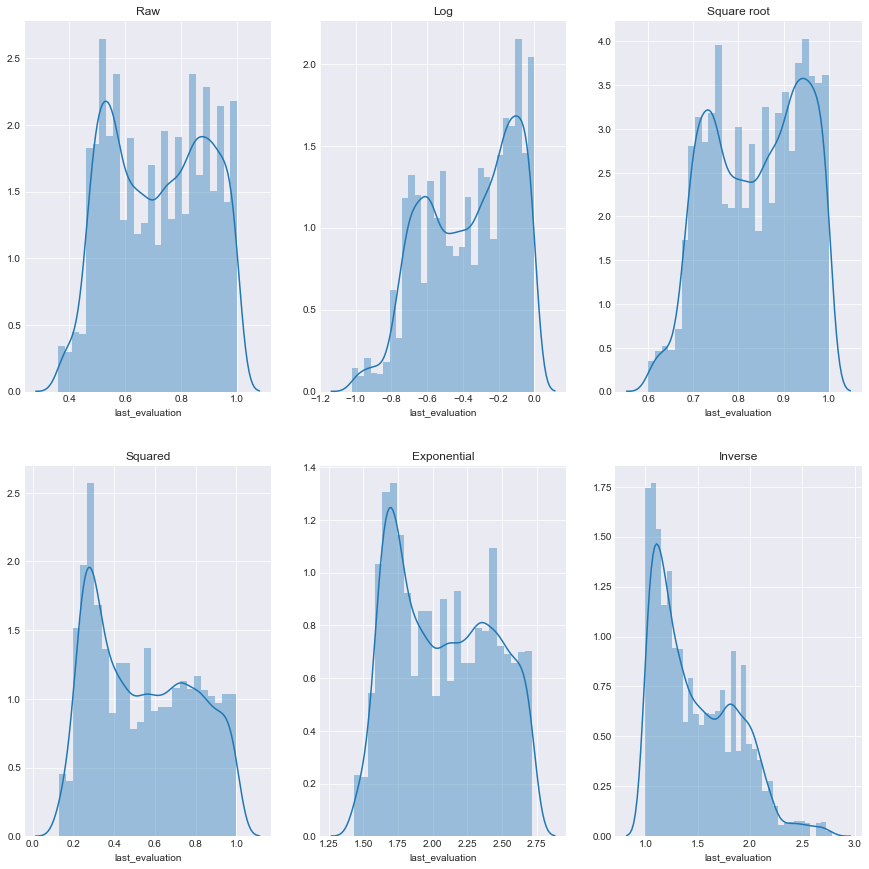

In [8]:
# Let's see if we can create any normal distributions by transforming the data

f, ax = plt.subplots(figsize=(15,15))

plt.subplot(2,3,1)
sns.distplot(df['last_evaluation'].dropna())
plt.title('Raw')

plt.subplot(2,3,2)
sns.distplot(np.log(df['last_evaluation'].dropna()))
plt.title('Log')

plt.subplot(2,3,3)
sns.distplot(np.sqrt(df['last_evaluation'].dropna()))
plt.title('Square root')

plt.subplot(2,3,4)
sns.distplot(np.square(df['last_evaluation'].dropna()))
plt.title('Squared')

plt.subplot(2,3,5)
sns.distplot(np.exp(df['last_evaluation'].dropna()))
plt.title('Exponential')

plt.subplot(2,3,6)
sns.distplot(1/df['last_evaluation'].dropna())
plt.title('Inverse')

plt.show()

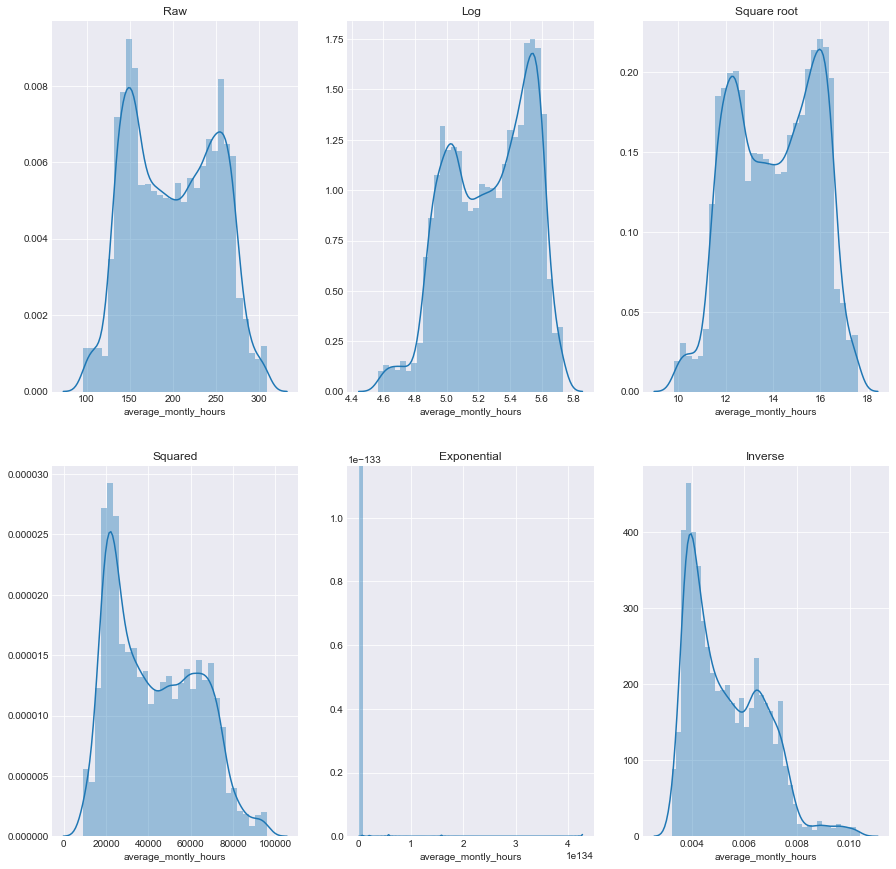

In [9]:
# Let's see if we can create any normal distributions by transforming the data

f, ax = plt.subplots(figsize=(15,15))

plt.subplot(2,3,1)
sns.distplot(df['average_montly_hours'].dropna())
plt.title('Raw')

plt.subplot(2,3,2)
sns.distplot(np.log(df['average_montly_hours'].dropna()))
plt.title('Log')

plt.subplot(2,3,3)
sns.distplot(np.sqrt(df['average_montly_hours'].dropna()))
plt.title('Square root')

plt.subplot(2,3,4)
sns.distplot(np.square(df['average_montly_hours'].dropna()))
plt.title('Squared')

plt.subplot(2,3,5)
sns.distplot(np.exp(df['average_montly_hours'].dropna()))
plt.title('Exponential')

plt.subplot(2,3,6)
sns.distplot(1/df['average_montly_hours'].dropna())
plt.title('Inverse')

plt.show()

#### Notes

1) Variable number of projects has a normal distribution

2) None of the other variables have any recognizable distribution patterns. However, when you transform them, there are some instances of recognizable distribution patterns

## Bivariate Data Exploration - Continuous Variables

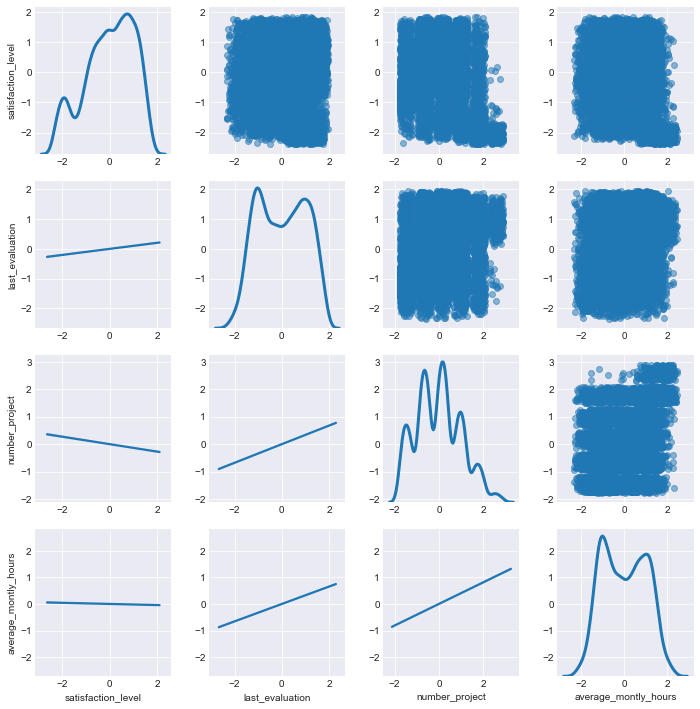

In [10]:
## Next we'll explore relationships between continuous variables.

# Create a matrix with data from continuous variables.
df_continuous = df.iloc[:,:4]

# Stanardize the data.
from sklearn.preprocessing import StandardScaler
df_continuous_standard = StandardScaler().fit_transform(df_continuous)

# Transpose from array to DataFrame.
df_continuous_standard = pd.DataFrame(df_continuous_standard, columns=df_continuous.columns, index=df_continuous.index)

# Add jitter.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_continuous_standard.shape)),
    columns=df_continuous.columns,
    index=df_continuous.index
)

df_continuous_standard_jitter = df_continuous_standard.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_continuous_standard_jitter.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   

                      average_montly_hours  
satisfaction_level               -0.020048  
last_evaluation                   0.339742  
number_project                    0.417211  
average_montly_hours              1.000000  


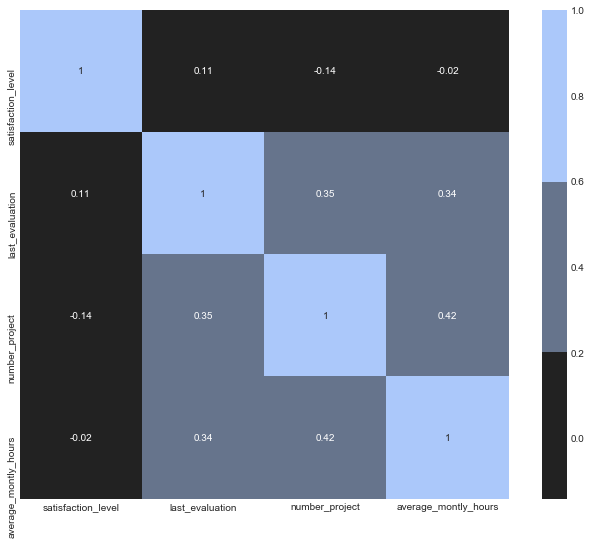

In [11]:
## Let's check to see if there are any relationships

# Make the correlation matrix.
corrmat = df_continuous.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
color = sns.diverging_palette(250, 250, s=90, l=80, sep=5, n=5, center='dark')
sns.heatmap(corrmat, center=0, annot=True, cmap=color, square=True)
plt.show()

#### Notes:

1) There is a medium-strength correlation between the number of projects someone worked on, and how many hours they work per month - this is logical as someone who works more hours is most likely working on more projects

2) There is also a slightly weaker correlation between how well they scored on their last evaluation, and how much they work and how many projects they complete. This is also a logical correlation

3) There is absolutely NO relationship between job satisfaction level and ANY of the other variables

In [12]:
## Exploring relationships via data transformation

# Create function to easily transform continuous variables

def transformation_matrix (series):
    df = pd.DataFrame(series)
    df['log'] = np.log(series)
    df['sqrt'] = np.sqrt(series)
    df['square'] = np.square(series)
    df['exponent'] = np.exp(series)
    df['inverse'] = 1/series
    
    return df

In [13]:
# Create a function for plotting variable against every iteration in the transformation matrix 

def plotting_transformations (df, y):
    f, ax = plt.subplots(figsize=(15,15))

    plt.subplot(2,3,1)
    sns.regplot(df.iloc[:,0], y, scatter=True, fit_reg=True)
    plt.title('Raw - r:{:.3f}'.format((np.corrcoef(df.iloc[:,0], y))[0][1]))

    plt.subplot(2,3,2)
    sns.regplot(df.iloc[:,1], y, scatter=True, fit_reg=True)
    plt.title('Log - r:{:.3f}'.format((np.corrcoef(df.iloc[:,1], y))[0][1]))

    plt.subplot(2,3,3)
    sns.regplot(df.iloc[:,2], y, scatter=True, fit_reg=True)
    plt.title('Square root - r:{:.3f}'.format((np.corrcoef(df.iloc[:,2], y))[0][1]))

    plt.subplot(2,3,4)
    sns.regplot(df.iloc[:,3], y, scatter=True, fit_reg=True)
    plt.title('Squared - r:{:.3f}'.format((np.corrcoef(df.iloc[:,3], y))[0][1]))

    plt.subplot(2,3,5)
    sns.regplot(df.iloc[:,4], y, scatter=True, fit_reg=True)
    plt.title('Exponential - r:{:.3f}'.format((np.corrcoef(df.iloc[:,4], y))[0][1]))

    plt.subplot(2,3,6)
    sns.regplot(df.iloc[:,5], y, scatter=True, fit_reg=True)
    plt.title('Inverse - r:{:.3f}'.format((np.corrcoef(df.iloc[:,5], y))[0][1]))

    plt.show()

In [14]:
df_satisfaction_level = transformation_matrix(df.satisfaction_level)
df_last_evaluation = transformation_matrix(df.last_evaluation)
df_number_project = transformation_matrix(df.number_project)
df_average_monthly_hours = transformation_matrix(df.average_montly_hours)

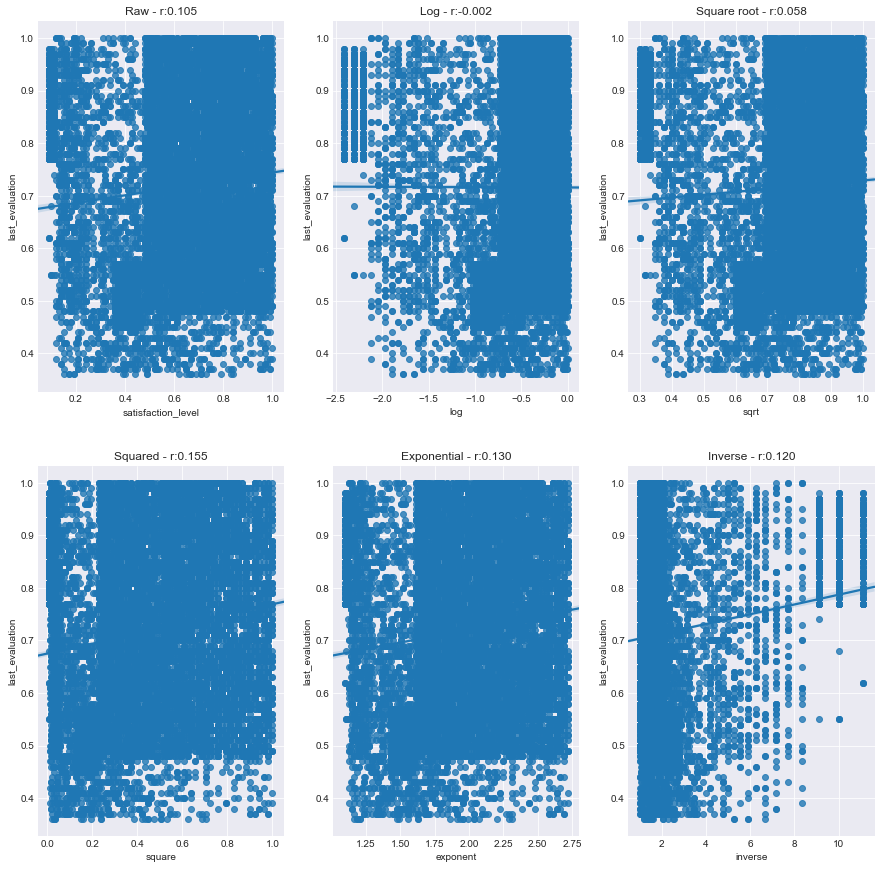

In [15]:
plotting_transformations(df_satisfaction_level, df.last_evaluation)

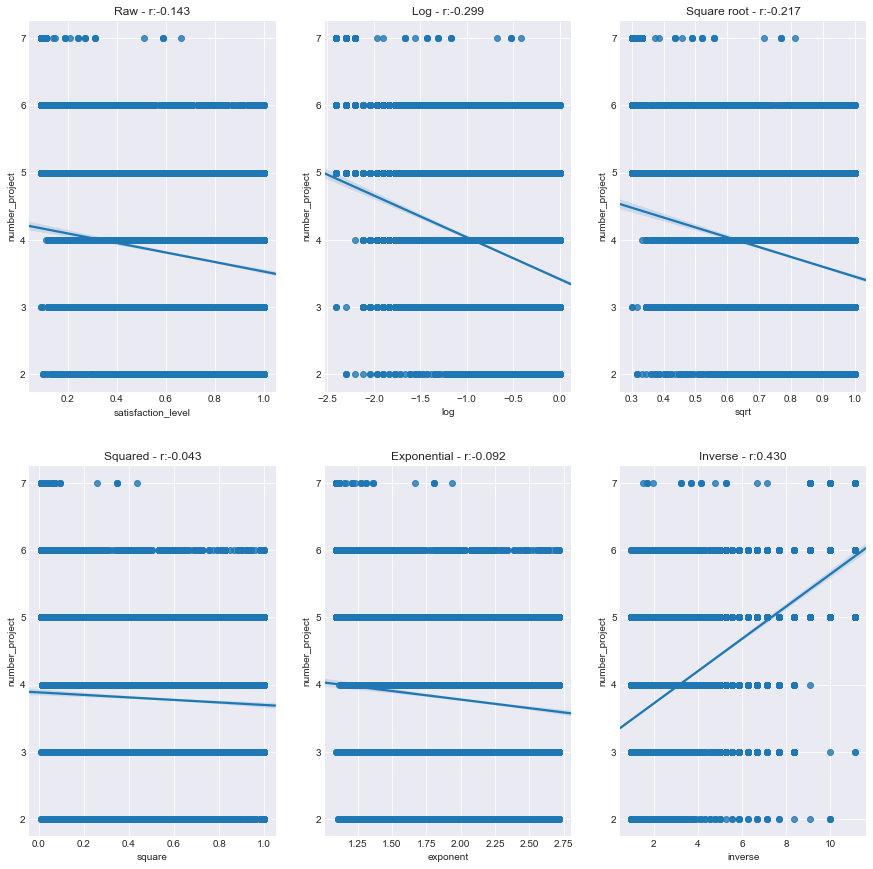

In [16]:
plotting_transformations(df_satisfaction_level, df.number_project)

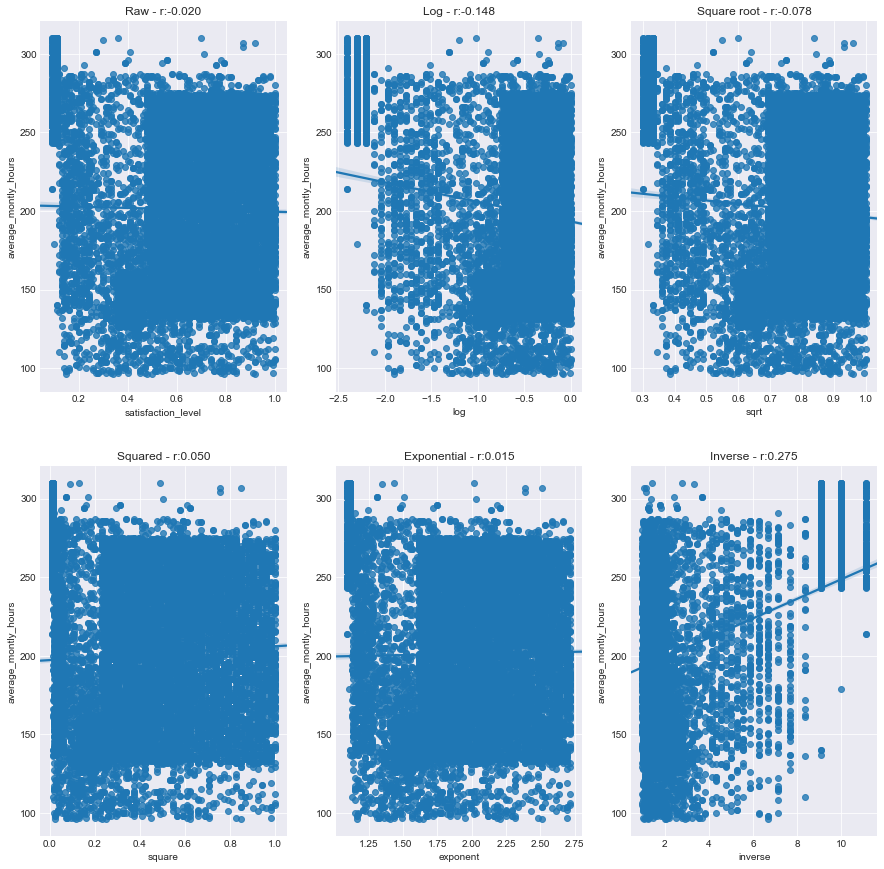

In [17]:
plotting_transformations(df_satisfaction_level, df.average_montly_hours)

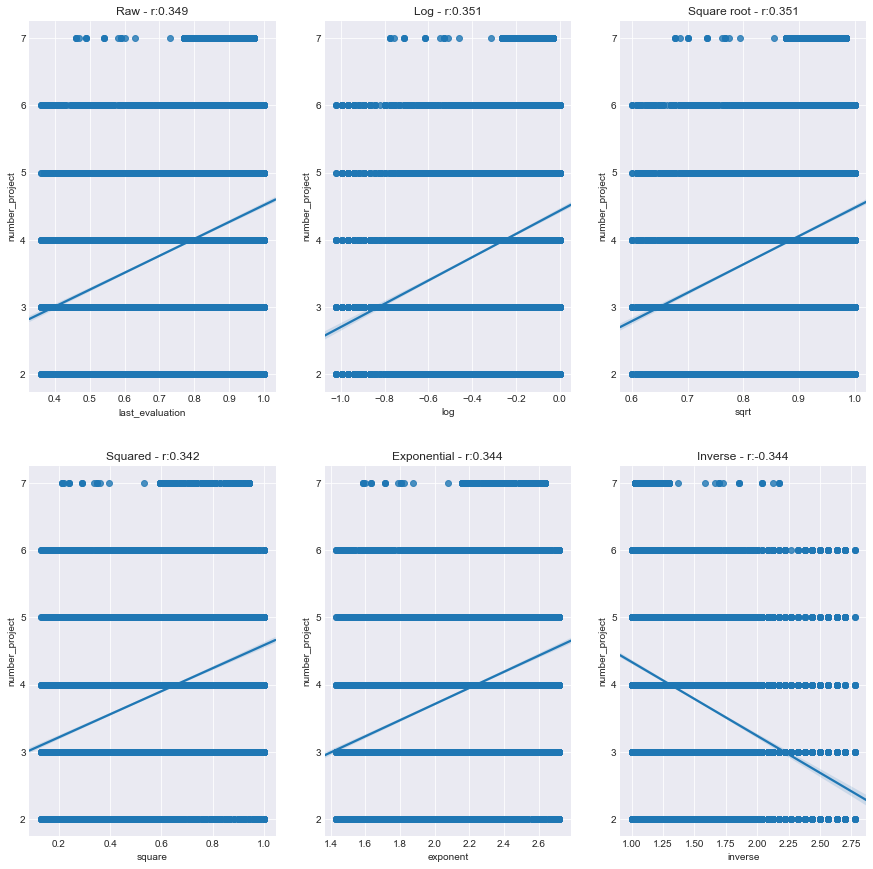

In [18]:
plotting_transformations(df_last_evaluation, df.number_project)

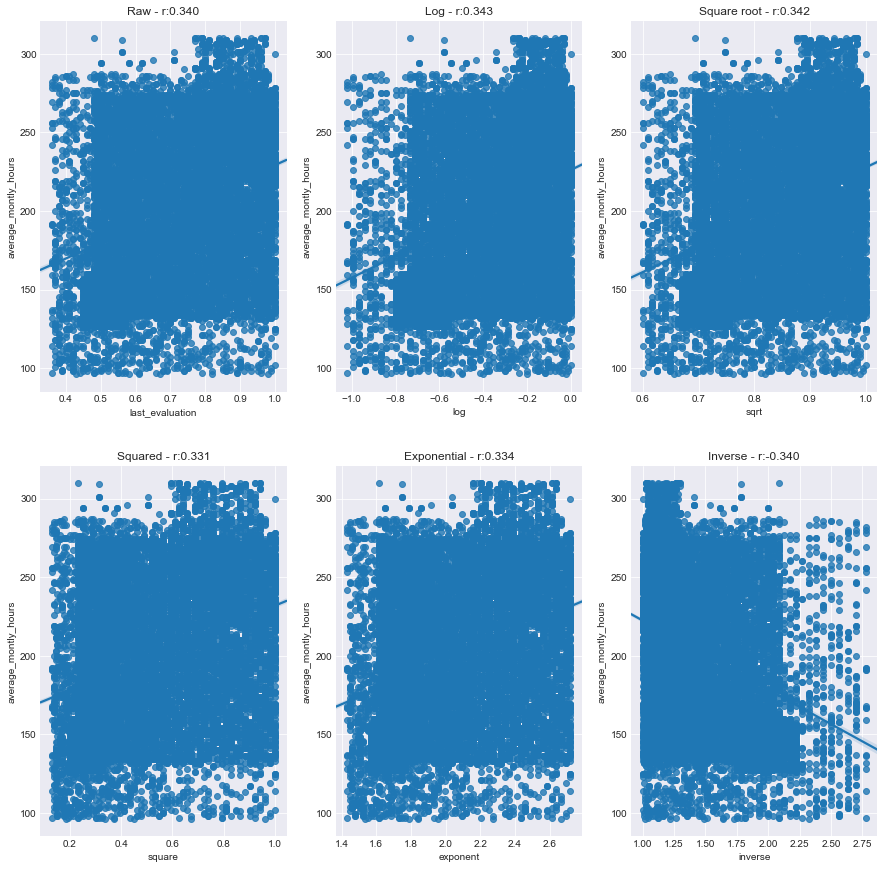

In [19]:
plotting_transformations(df_last_evaluation, df.average_montly_hours)

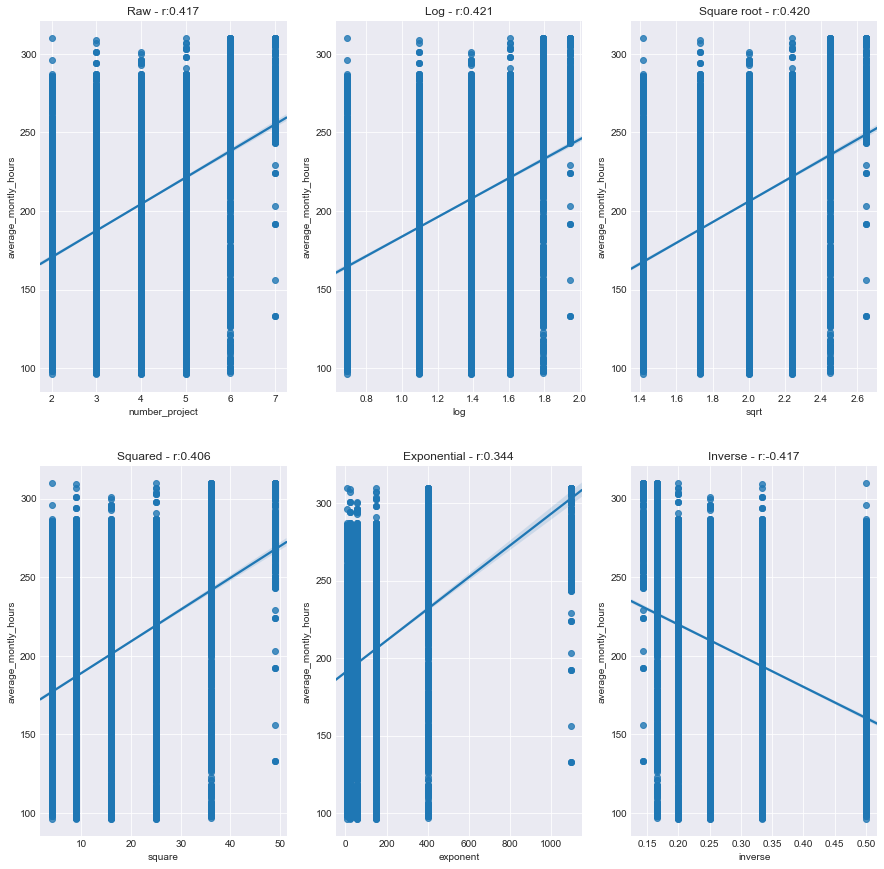

In [20]:
plotting_transformations(df_number_project, df.average_montly_hours)

#### Notes:
1) Relationship of interest is that the inverse of satisfaction levels has a medium strength correlation to the number of projects

## Bivariate Data Exploration - Continuous vs. Categorical Variables

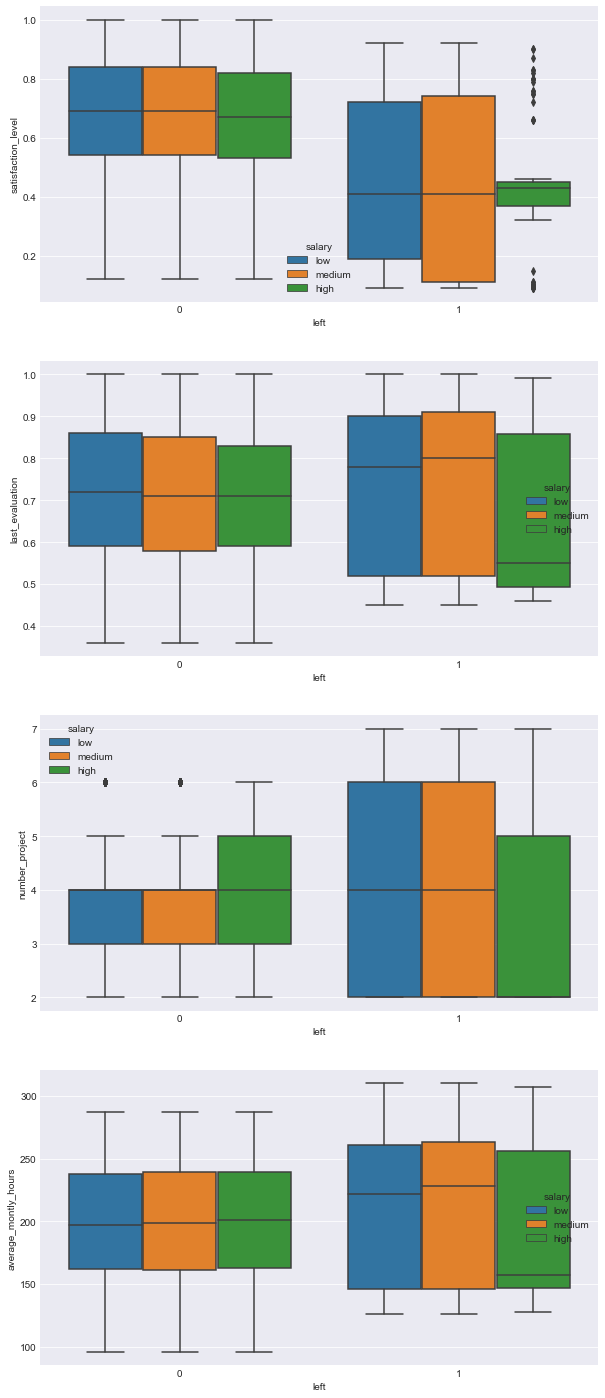

In [21]:
## Create plots to visually inspect impact of categorical variables on continuous variable means.

# Boxplots for continuous variables, pivoted by salary.

f, ax = plt.subplots(figsize=(10,25))

plt.subplot(4,1,1)
sns.boxplot(x='left', y='satisfaction_level', hue='salary', data=df)

plt.subplot(4,1,2)
sns.boxplot(x='left', y='last_evaluation', hue='salary', data=df)

plt.subplot(4,1,3)
sns.boxplot(x='left', y='number_project', hue='salary', data=df)

plt.subplot(4,1,4)
sns.boxplot(x='left', y='average_montly_hours', hue='salary', data=df)

#### Notes:

1) Individuals in different salary pools behave differently:
- Those in the medium-low range are more likely to leave for a higher salary, and are more ambitious (indiviuals in this class who left worked more hours and had higher evalutions)
- Those in the high range are more likely to leave because they are not engaged in their work. For these individuals, a low average of monthly hours worked and poor evaluations were predictors of the employee leaving

2) Satisfaction obviously plays a huge role here as well

In [22]:
## Because high salary individuals clearly behave drastically differently, we will split the continuous variables
## into 2 buckets - low-medium and high - and run a t-test to compare continuous variable means between those 
## employees that left and those that didn't


# Split dataframe into 2 groups

df_salary_high = df[df.salary == 'high']

df_salary_low_medium = df[(df.salary == 'low')|(df.salary == 'medium')]

In [23]:
# Run t-tests for high salary group

for col in df_salary_high.iloc[:,:4].columns:
    print(col.capitalize())
    print(stats.ttest_ind(
        df_salary_high[df_salary_high['left']==0][col].dropna(),
        df_salary_high[df_salary_high['left']==1][col].dropna()
    ))
    print('\n')

Satisfaction_level
Ttest_indResult(statistic=8.632284062786425, pvalue=1.8245969274670814e-17)


Last_evaluation
Ttest_indResult(statistic=3.5798286493858633, pvalue=0.0003571560786820494)


Number_project
Ttest_indResult(statistic=2.726827295348624, pvalue=0.006485174172811477)


Average_montly_hours
Ttest_indResult(statistic=1.330154619360064, pvalue=0.1837129138974042)




In [24]:
# Run t-tests for low_med salary group

for col in df_salary_low_medium.iloc[:,:4].columns:
    print(col.capitalize())
    print(stats.ttest_ind(
        df_salary_low_medium[df_salary_low_medium['left']==0][col].dropna(),
        df_salary_low_medium[df_salary_low_medium['left']==1][col].dropna()
    ))
    print('\n')

Satisfaction_level
Ttest_indResult(statistic=50.67743213289434, pvalue=0.0)


Last_evaluation
Ttest_indResult(statistic=-1.069264266188586, pvalue=0.2849693641860984)


Number_project
Ttest_indResult(statistic=-3.2267005176039087, pvalue=0.0012551941795532525)


Average_montly_hours
Ttest_indResult(statistic=-9.02439634876189, pvalue=2.0433050300437879e-19)




#### Notes:

**Satisfaction Level**:
- Has a huge impact for both groups - lower satisfaction increases likelihood of leaving

**Last Evaluation**:
- Has NO significance in the low-med group
- Has high significance (p-value <.0001) in high salary group - lower evaluation increases likelihood of leaving

**Number Projects**:
- Has a significant impact on both groups (p-value < .01), BUT in different ways
- For low-med group, less projects per month decreases likelihood of leaving
- For high group, less projects pre month increases likelihood of leaving

**Average Monthly Hours**:
- Has NO significance in the low-med group
- Has HUGE signifiance in the high group - the less hours an employee works the higher the likelihood of leaving

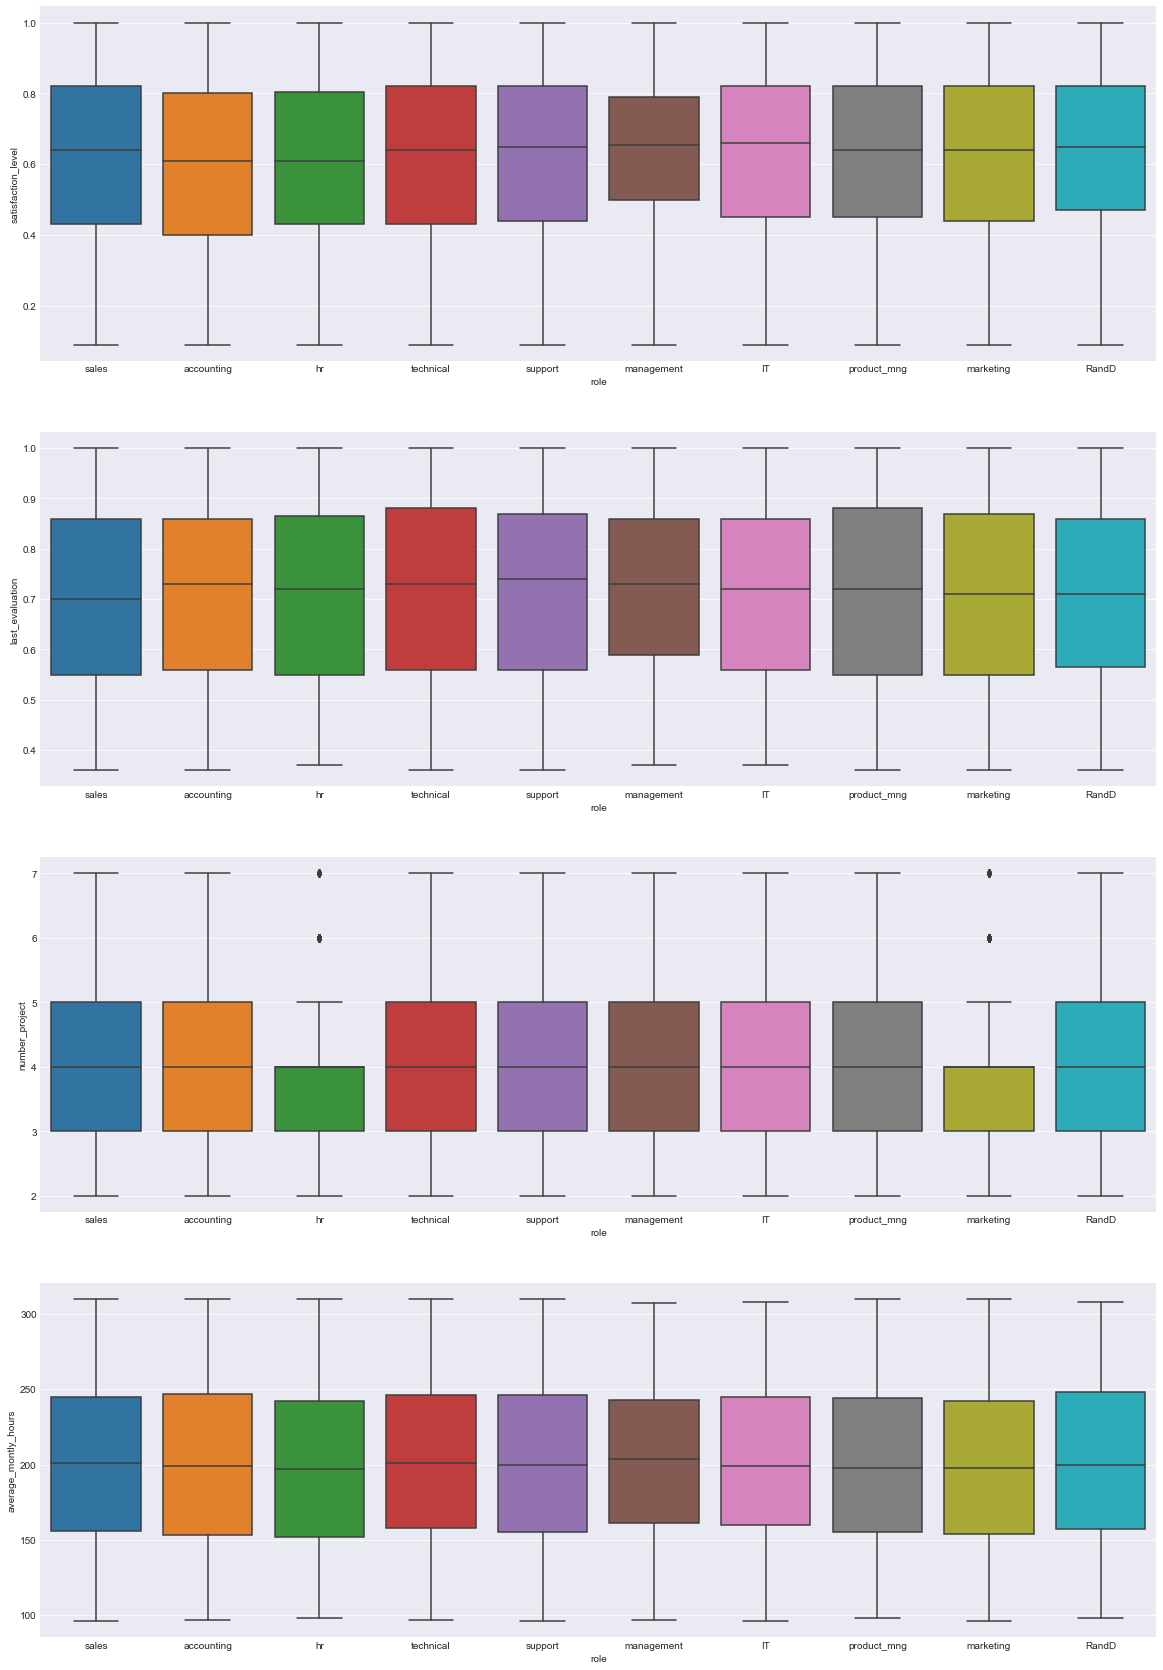

In [25]:
# Run the same evaluation as above for job role

f, ax = plt.subplots(figsize=(20,30))

plt.subplot(4,1,1)
sns.boxplot(x='role', y='satisfaction_level', data=df)

plt.subplot(4,1,2)
sns.boxplot(x='role', y='last_evaluation', data=df)

plt.subplot(4,1,3)
sns.boxplot(x='role', y='number_project', data=df)

plt.subplot(4,1,4)
sns.boxplot(x='role', y='average_montly_hours', data=df)

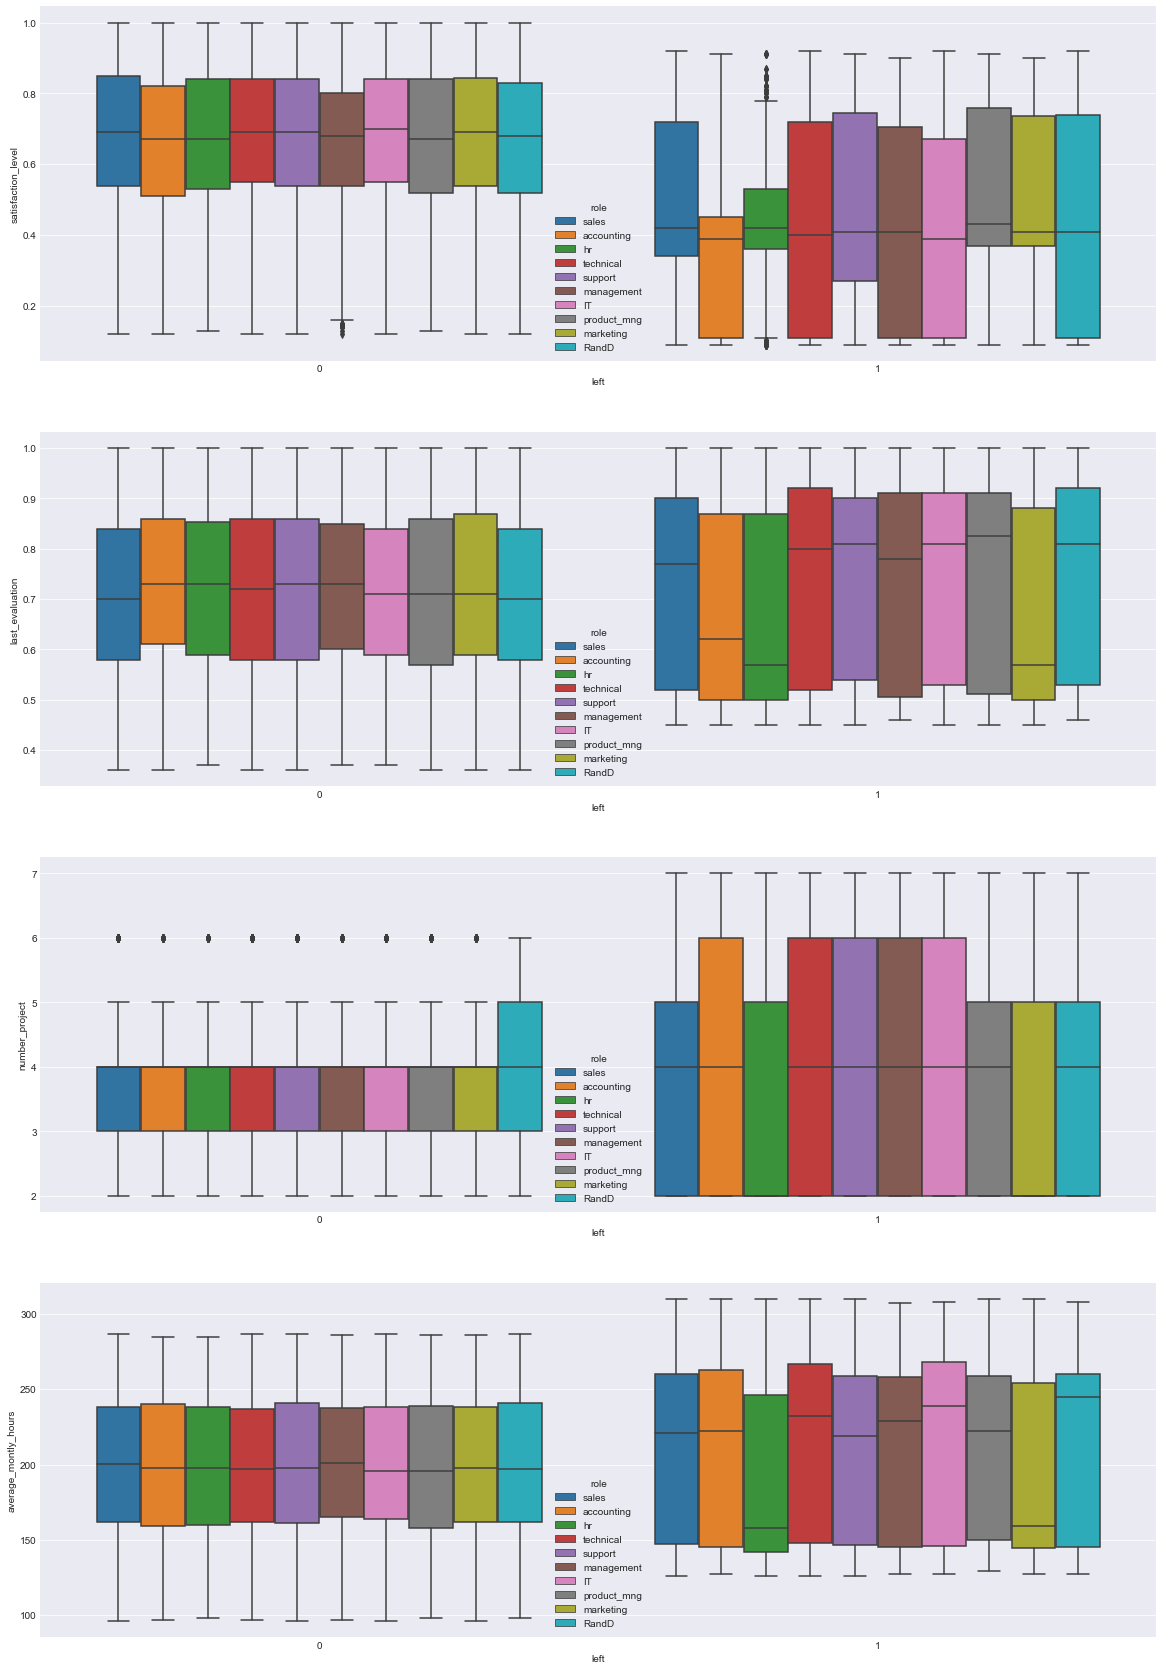

In [26]:
# Just for good measure, let's explore the relationships in light of the outcome variable

f, ax = plt.subplots(figsize=(20,30))

plt.subplot(4,1,1)
sns.boxplot(x='left', y='satisfaction_level', hue='role', data=df)

plt.subplot(4,1,2)
sns.boxplot(x='left', y='last_evaluation', hue='role', data=df)

plt.subplot(4,1,3)
sns.boxplot(x='left', y='number_project', hue='role', data=df)

plt.subplot(4,1,4)
sns.boxplot(x='left', y='average_montly_hours', hue='role', data=df)

In [27]:
# Create function to run Kruskal-Wallis test on a continuous variable grouped by role 

def kw_test(continuous_var_series):
    groups = []
    for role in df.role.unique():
        groups.append(np.array(continuous_var_series[df['role'] == role]))
    
    return stats.kruskal(groups[0],
                         groups[1],
                         groups[2],
                         groups[3],
                         groups[4],
                         groups[5],
                         groups[6],
                         groups[7],
                         groups[8],
                         groups[9]
                        )


# Create function to run 1-way ANOVA test on a continuous variable grouped by role 

def anova_test(continuous_var_series):
    groups = []
    for role in df.role.unique():
        groups.append(np.array(continuous_var_series[df['role'] == role]))
    
    return stats.f_oneway(groups[0],
                         groups[1],
                         groups[2],
                         groups[3],
                         groups[4],
                         groups[5],
                         groups[6],
                         groups[7],
                         groups[8],
                         groups[9]
                        )

In [28]:
print('Satisfaction Level')
print(kw_test(df.satisfaction_level))

print('\nLast Evaluation')
print(kw_test(df.last_evaluation))

print('\nNumber of Projects')
print(anova_test(df.number_project)) #Number of projects is normally distributed, so we run an ANOVA test

print('\nAverage Monthly Hours')
print(kw_test(df.average_montly_hours))

Satisfaction Level
KruskalResult(statistic=18.2957049285645, pvalue=0.031893764767489896)

Last Evaluation
KruskalResult(statistic=14.94011198894277, pvalue=0.09259418788920366)

Number of Projects
F_onewayResult(statistic=3.7044817508038155, pvalue=0.00011787808927553371)

Average Monthly Hours
KruskalResult(statistic=7.247893611561471, pvalue=0.6113273228907196)


#### Notes:
1) Role that an employee has plays a somewhat significant impact on satisfaction levels, but a very low magnitude
2) When removing outliers, role that employee has has no impact on number of projects
3) None of the other 2 continuous variables are impacted by an employees role
4) When diving deeper into specific roles, some of them have an impact on average monthly hours

## Bivariate Data Exploration - Categorical Variables

<function matplotlib.pyplot.show>

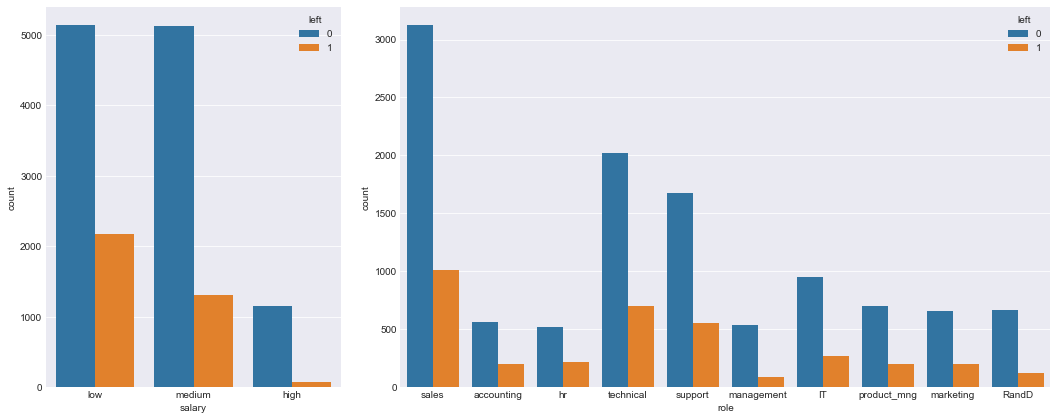

In [29]:
# Barplot to compare how the 2 categorical variables effect desired outcome variable

from matplotlib.gridspec import GridSpec
gs = GridSpec(1,3)
f, ax = plt.subplots(figsize=(18,7))

plt.subplot(gs[:,:1])
sns.countplot(x='salary', hue='left', data=df)

plt.subplot(gs[:,1:])
sns.countplot(x='role', hue='left', data=df)

plt.show

In [30]:
# Because the data has so many more data points for individuals who did not leave,
# the above plot unfortunately does not tell us much.

# Let's run a chi-square test on salary to determine whether there is a meaningful difference,
# and also break it out into the 2 groups we explored earlier

counttable_salary = pd.crosstab(df['salary'], df['left'])
counttable_salary_high = pd.crosstab(df_salary_high['salary'], df_salary_high['left'])
counttable_salary_low_medium = pd.crosstab(df_salary_low_medium['salary'], df_salary_low_medium['left'])

print ('Salary\n')
print ('The p-value for salary impact is {}'.format((stats.chisquare(counttable_salary, axis=None))[1]))
print ('The p-value for salary impact for those making a high salary is {}'.format((stats.chisquare(counttable_salary_high, axis=None))[1]))
print ('The p-value for salary impact for those making a low or medium salary is {}'.format((stats.chisquare(counttable_salary_low_medium, axis=None))[1]))

Salary

The p-value for salary impact is 0.0
The p-value for salary impact for those making a high salary is 2.0361103658821264e-204
The p-value for salary impact for those making a low or medium salary is 0.0


In [31]:
# Let's do the same for roles in the company

counttable_role = pd.crosstab(df['left'], df['role'])

print ('Role\n')
print ('The p-value for whether role has an impact is {}'.format((stats.chisquare(counttable_role, axis=None))[1]))

Role

The p-value for whether role has an impact is 0.0


In [32]:
# Checking if specific roles hold more weight than others

for role in df.role.unique():
    df_role = df[df['role'] == role]
    counttable = pd.crosstab(df['left'], df['role'])
    print ('P-value for {} is {}'.format(role,(stats.chisquare(counttable, axis=None))[1]))

P-value for sales is 0.0
P-value for accounting is 0.0
P-value for hr is 0.0
P-value for technical is 0.0
P-value for support is 0.0
P-value for management is 0.0
P-value for IT is 0.0
P-value for product_mng is 0.0
P-value for marketing is 0.0
P-value for RandD is 0.0


Text(0.5,1,'Low or Medium Salary Levels')

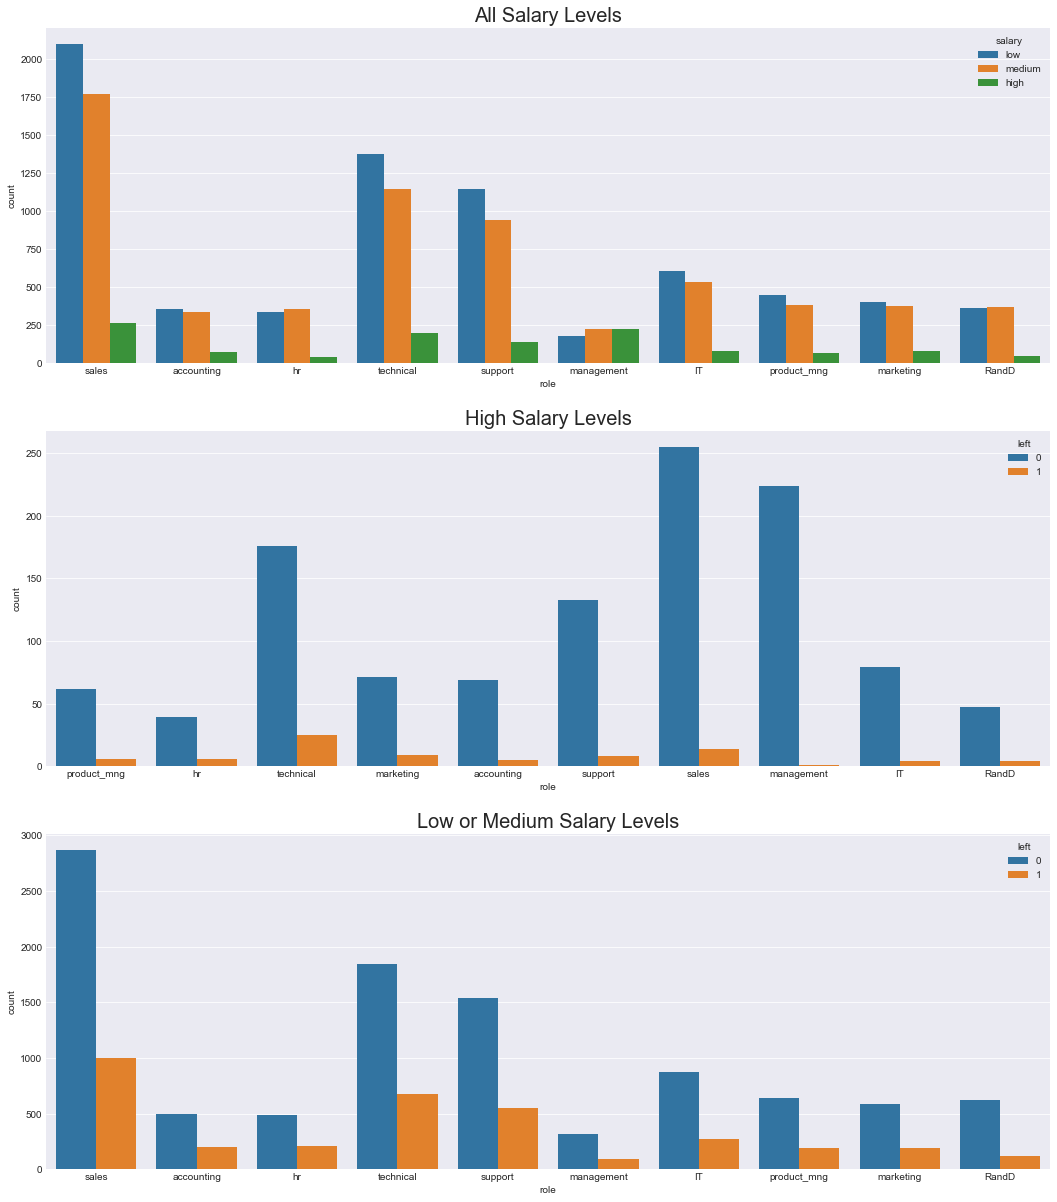

In [33]:
# Finally, let's see if the 2 correlate together as well

f, ax = plt.subplots(figsize=(18,21))

plt.subplot(311)
sns.countplot(x='role', hue='salary', data=df)
plt.title('All Salary Levels', fontdict={'fontsize':20})

plt.subplot(312)
sns.countplot(x='role', hue='left', data=df_salary_high)
plt.title('High Salary Levels', fontdict={'fontsize':20})

plt.subplot(313)
sns.countplot(x='role', hue='left', data=df_salary_low_medium)
plt.title('Low or Medium Salary Levels', fontdict={'fontsize':20})

#### Notes:

1) It's clear that all categorical variables have an impact on each other

## Feature Engineering

In [34]:
# Creating data frame to hold our features

features = pd.DataFrame(df.salary)


# Coding salary as a binary, ordinal variable because there is a distinct difference 
# in outcomes between high and low/medium salaries

features['salary_binary'] = np.where((df['salary']=='high'), 1, 0)
del features['salary']
features.head()

,salary_binary
0,0
1,0
2,0
3,0
4,0


In [35]:
# Combining 2 highly correlated continuous variables

means = df[['average_montly_hours','number_project']].mean(axis=0)
stds = df[['average_montly_hours','number_project']].std(axis=0)
features['combining_correlated_vars'] = ((df[['average_montly_hours','number_project']] - means) / stds).mean(axis=1)

In [36]:
# Testing how well new combined variable correlates with previous variables

test_corrmatt = df.iloc[:,2:4]
test_corrmatt['feature'] = features['combining_correlated_vars']
print(test_corrmatt.corr())

                      number_project  average_montly_hours   feature
number_project              1.000000              0.417211  0.841787
average_montly_hours        0.417211              1.000000  0.841787
feature                     0.841787              0.841787  1.000000


In [37]:
# Multiplying interacting vars together

features['salary_last_evaluation'] = features['salary_binary'] * df['last_evaluation']
features['salary_number_project'] = features['salary_binary'] * df['number_project']
features['salary_monthly_hours'] = features['salary_binary'] * df['average_montly_hours']
features.head(20)

,salary_binary,combining_correlated_vars,salary_last_evaluation,salary_number_project,salary_monthly_hours
0,0,-1.172412,0.0,0,0
1,0,1.095731,0.0,0,0
2,0,2.007143,0.0,0,0
3,0,0.705287,0.0,0,0
4,0,-1.152390,0.0,0,0
5,0,-1.212458,0.0,0,0
6,0,1.351210,0.0,0,0
7,0,1.065697,0.0,0,0
8,0,0.715298,0.0,0,0
9,0,-1.322583,0.0,0,0


In [38]:
# Running PCA on continuous variables - condensing 4 variables into 2 features

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(df_continuous_standard)

print('Selected PC components explain {:.2f}% of variance'.format((sklearn_pca.explained_variance_ratio_[0] + sklearn_pca.explained_variance_ratio_[1])))

Selected PC components explain 0.70% of variance


In [39]:
# Because PC components do not explain over 80% of variance they are not particularly useful

# Adding original df to features

features = pd.concat([features,df], axis=1)
del [features['role'], features['salary']]
features.head()

,salary_binary,combining_correlated_vars,salary_last_evaluation,salary_number_project,salary_monthly_hours,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0,-1.172412,0.0,0,0,0.38,0.53,2,157,3,0,1,0
1,0,1.095731,0.0,0,0,0.80,0.86,5,262,6,0,1,0
2,0,2.007143,0.0,0,0,0.11,0.88,7,272,4,0,1,0
3,0,0.705287,0.0,0,0,0.72,0.87,5,223,5,0,1,0
4,0,-1.152390,0.0,0,0,0.37,0.52,2,159,3,0,1,0


## Modeling

In [40]:
# Because we are concerned with predicting churn, we will resample data set so there is a 60-40 representation
# of employees who left and those who did not so that our models have a greater preference for false positives
# over false negatives (prioritizing sensitivity over specificity)


# Create function to run resampled algorithm 10 times
def resampling (features, target, algorithm):
    from imblearn.under_sampling import RandomUnderSampler
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import confusion_matrix

    accuracy = []
    sensitivity = []
    specificity = []
    
    for i in range(10):
        # Resample data
        rus = RandomUnderSampler(ratio={0: 5356, 1: 3571})
        features_resample, target_resample = rus.fit_sample(features, target)
        # Break data into testing and training sets
        X_train, X_test, y_train, y_test = train_test_split(features_resample, target_resample, test_size=0.25)
        # Run algorithm
        algorithm.fit(X_train, y_train)
        # Determine accuracy rating
        score = algorithm.score(X_test, y_test)
        accuracy.append(score)
        # Determine sensitivity and specificity
        y_pred = algorithm.predict(X_test)
        confusion_mat = confusion_matrix(y_test, y_pred, labels=[0,1])
        sample_sensitivity = confusion_mat[1][1]/sum(confusion_mat[1])
        sample_specificity = confusion_mat[0][0]/sum(confusion_mat[0])
        sensitivity.append(sample_sensitivity)
        specificity.append(sample_specificity)
        
        
    return accuracy, sensitivity, specificity


##### Model 1: Multivariable Logistic Regression

In [41]:
# Review linear assumptions of feature relationships

features.corr()

,salary_binary,combining_correlated_vars,salary_last_evaluation,salary_number_project,salary_monthly_hours,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary_binary,1.000000,-0.009401,0.973481,0.957409,0.970346,0.029708,-0.020628,-0.008726,-0.007101,0.039953,0.009040,-0.120929,0.076756
combining_correlated_vars,-0.009401,1.000000,0.003365,0.042963,0.036815,-0.096828,0.409293,0.841787,0.841787,0.192769,-0.008840,0.056472,-0.005707
salary_last_evaluation,0.973481,0.003365,1.000000,0.940251,0.956816,0.034706,0.040773,-0.001267,0.006932,0.039451,0.008238,-0.121612,0.071676
salary_number_project,0.957409,0.042963,0.940251,1.000000,0.941600,0.020406,-0.010179,0.064856,0.007476,0.048187,0.009303,-0.119526,0.072959
salary_monthly_hours,0.970346,0.036815,0.956816,0.941600,1.000000,0.030820,-0.005827,0.002582,0.059399,0.040243,0.007311,-0.118877,0.072250
satisfaction_level,0.029708,-0.096828,0.034706,0.020406,0.030820,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,-0.020628,0.409293,0.040773,-0.010179,-0.005827,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.008726,0.841787,-0.001267,0.064856,0.002582,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.007101,0.841787,0.006932,0.007476,0.059399,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,0.039953,0.192769,0.039451,0.048187,0.040243,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433


In [42]:
# Selecting features based on high correlation with outcome variable and low collinearity

regr_features = features[['salary_last_evaluation', 'satisfaction_level', 'time_spend_company', 'Work_accident']]

In [43]:
# Set arguments
feature_set = np.array(regr_features)
target = np.array(df.left)
algorithm = sklearn.linear_model.LogisticRegression()

# Run model
results = resampling(feature_set, target, algorithm)
regr_accuracy = np.array(results[0]).mean()
regr_sensitivity = np.array(results[1]).mean()
regr_specificity = np.array(results[2]).mean()

# Print results
print (regr_accuracy)
print (regr_specificity)
print (regr_sensitivity)

0.7762544802867384
0.8423843329657157
0.6769694089551404


**Conclusion**: The model has about a 77% accuracy rating. Let's see if other models will operate more efficiently, and come back to optimize if we find that's not the case.

##### Model 2: Naive Bayes - Multinomial

In [44]:
# Review features

features.head()

,salary_binary,combining_correlated_vars,salary_last_evaluation,salary_number_project,salary_monthly_hours,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0,-1.172412,0.0,0,0,0.38,0.53,2,157,3,0,1,0
1,0,1.095731,0.0,0,0,0.80,0.86,5,262,6,0,1,0
2,0,2.007143,0.0,0,0,0.11,0.88,7,272,4,0,1,0
3,0,0.705287,0.0,0,0,0.72,0.87,5,223,5,0,1,0
4,0,-1.152390,0.0,0,0,0.37,0.52,2,159,3,0,1,0


In [45]:
# Select discrete values and confirm relative independence

MultinomialNB_features = features[['salary_binary','number_project','average_montly_hours','time_spend_company','Work_accident']]
MultinomialNB_features.corr()

,salary_binary,number_project,average_montly_hours,time_spend_company,Work_accident
salary_binary,1.000000,-0.008726,-0.007101,0.039953,0.009040
number_project,-0.008726,1.000000,0.417211,0.196786,-0.004741
average_montly_hours,-0.007101,0.417211,1.000000,0.127755,-0.010143
time_spend_company,0.039953,0.196786,0.127755,1.000000,0.002120
Work_accident,0.009040,-0.004741,-0.010143,0.002120,1.000000


In [46]:
# Multiply 2 correlating variables to remove dependence

MultinomialNB_features['combined'] = features.number_project * features.average_montly_hours
del MultinomialNB_features['number_project']
del MultinomialNB_features['average_montly_hours']
MultinomialNB_features.head()

/Users/Albert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,salary_binary,time_spend_company,Work_accident,combined
0,0,3,0,314
1,0,6,0,1310
2,0,4,0,1904
3,0,5,0,1115
4,0,3,0,318


In [47]:
# Set arguments
feature_set = np.array(MultinomialNB_features)
target = np.array(df.left)
from sklearn.naive_bayes import MultinomialNB
algorithm = MultinomialNB()

# Run model
results = resampling(feature_set, target, algorithm)
mnb_accuracy = np.array(results[0]).mean()
mnb_sensitivity = np.array(results[1]).mean()
mnb_specificity = np.array(results[2]).mean()

# Print results
print (mnb_accuracy)
print (mnb_specificity)
print (mnb_sensitivity)

0.6708781362007168
0.9382419464783378
0.26907224311146055


**Conclusion**: Clearly less predictive power than a standar linear regressions

##### Model 3: Naive Bayes - Bernoulli

In [48]:
# Select binary values, add a few and confirm relative independence

BernoulliNB_features1 = pd.get_dummies(df.role)
BernoulliNB_features2 = features[['salary_binary','Work_accident','promotion_last_5years']]
BernoulliNB_features = pd.concat([BernoulliNB_features1, BernoulliNB_features2], axis=1)

BernoulliNB_features.corr()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary_binary,Work_accident,promotion_last_5years
IT,1.000000,-0.070240,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,-0.016089,-0.009293,-0.038942
RandD,-0.070240,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.015115,0.017167,0.021268
accounting,-0.069293,-0.054629,1.000000,-0.052848,-0.048610,-0.057183,-0.058723,-0.143341,-0.096989,-0.109262,0.011821,-0.012836,-0.004852
hr,-0.067949,-0.053570,-0.052848,1.000000,-0.047667,-0.056075,-0.057584,-0.140562,-0.095109,-0.107143,-0.017858,-0.015649,-0.001531
management,-0.062500,-0.049274,-0.048610,-0.047667,1.000000,-0.051578,-0.052966,-0.129289,-0.087482,-0.098551,0.209077,0.011242,0.128087
marketing,-0.073524,-0.057965,-0.057183,-0.056075,-0.051578,1.000000,-0.062308,-0.152093,-0.102911,-0.115933,0.009642,0.011367,0.049253
product_mng,-0.075503,-0.059525,-0.058723,-0.057584,-0.052966,-0.062308,1.000000,-0.156187,-0.105682,-0.119054,-0.006514,0.001246,-0.037288
sales,-0.184302,-0.145300,-0.143341,-0.140562,-0.129289,-0.152093,-0.156187,1.000000,-0.257967,-0.290608,-0.039273,-0.004955,0.012353
support,-0.124705,-0.098315,-0.096989,-0.095109,-0.087482,-0.102911,-0.105682,-0.257967,1.000000,-0.196636,-0.029184,0.012079,-0.035605
technical,-0.140484,-0.110755,-0.109262,-0.107143,-0.098551,-0.115933,-0.119054,-0.290608,-0.196636,1.000000,-0.014672,-0.006070,-0.035799


In [49]:
# Remove management role as it is related to salary

del BernoulliNB_features['management']

In [50]:
# Set arguments
feature_set = np.array(BernoulliNB_features)
target = np.array(df.left)
from sklearn.naive_bayes import BernoulliNB
algorithm = BernoulliNB()

# Run model
results = resampling(feature_set, target, algorithm)
bnb_accuracy = np.array(results[0]).mean()
bnb_sensitivity = np.array(results[1]).mean()
bnb_specificity = np.array(results[2]).mean()

# Print results
print (bnb_accuracy)
print (bnb_specificity)
print (bnb_sensitivity)

0.5999551971326165
0.9496553195198428
0.07388193380323223


**Conclusion**: Yikes, even worse than the one above

##### Model 4: KNN

In [51]:
# Select continuous variables

KNN_features = features[['satisfaction_level','last_evaluation','number_project','average_montly_hours']]

In [52]:
# Set arguments

feature_set = np.array(KNN_features)
target = np.array(df.left)
from sklearn.neighbors import KNeighborsClassifier as KNN

The optimal number of neighbors is 5


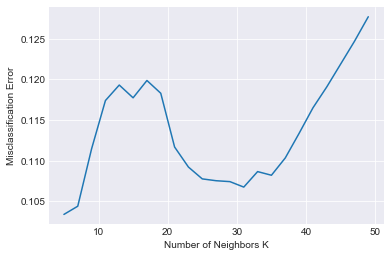

In [53]:
# Determine best k-value and weighting

# Resample data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(ratio={0: 5356, 1: 3571})
features_resample, target_resample = rus.fit_sample(feature_set, target)

# Create list of k-values for testing
neighbors = list(range(5,50,2))

# Empty list that will hold cv scores
cv_scores = []

# Perform 10-fold cross validation and store all scores
from sklearn.model_selection import cross_val_score
for k in neighbors:
    knn = KNN(n_neighbors=k)
    knn.fit(features_resample, target_resample)
    scores = cross_val_score(knn, features_resample, target_resample, cv=10)
    cv_scores.append(scores.mean())
    
# Changing to misclassification error
MSE = [1 - x for x in cv_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# Plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

The optimal number of neighbors is 31


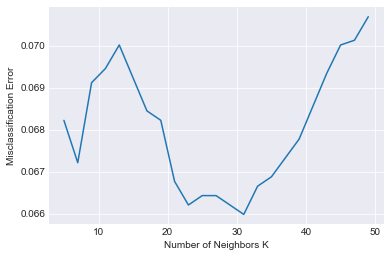

In [54]:
# Repeat above with weighted distances

# Resample data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(ratio={0: 5356, 1: 3571})
features_resample, target_resample = rus.fit_sample(feature_set, target)

# Create list of k-values for testing
neighbors = list(range(5,50,2))

# Empty list that will hold cv scores
cv_scores = []

# Perform 10-fold cross validation and store all scores
for k in neighbors:
    knn = KNN(n_neighbors=k, weights='distance')
    knn.fit(features_resample, target_resample)
    scores = cross_val_score(knn, features_resample, target_resample, cv=10)
    cv_scores.append(scores.mean())
    
# Changing to misclassification error
MSE = [1 - x for x in cv_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# Plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [55]:
# Set arguments for KNN with least misclassifaction errors (k=21, weighted by distance)

feature_set = np.array(KNN_features)
target = np.array(df.left)
from sklearn.neighbors import KNeighborsClassifier as KNN
algorithm = KNN(n_neighbors=1)

# Run model
results = resampling(feature_set, target, algorithm)
knn_accuracy = np.array(results[0]).mean()
knn_sensitivity = np.array(results[1]).mean()
knn_specificity = np.array(results[2]).mean()

# Print results
print (knn_accuracy)
print (knn_specificity)
print (knn_sensitivity)

0.9304659498207885
0.9190706847852562
0.947959584924099


In [56]:
# Set arguments for KNN with least misclassifaction errors (k=25, weights='distance')

feature_set = np.array(KNN_features)
target = np.array(df.left)
from sklearn.neighbors import KNeighborsClassifier as KNN
algorithm = KNN(n_neighbors=25, weights='distance')

# Run model
results = resampling(feature_set, target, algorithm)
knn_accuracy = np.array(results[0]).mean()
knn_sensitivity = np.array(results[1]).mean()
knn_specificity = np.array(results[2]).mean()

# Print results
print (knn_accuracy)
print (knn_specificity)
print (knn_sensitivity)

0.9269713261648744
0.9132048129895155
0.9472568179239589


**Conclusion**: DING DING DING! We have our winner

In [57]:
print('Accuracy | Specificity | Sensitivity')
print('\n')
print('Logistic Regression: {:.2f}% | {:.2f}% | {:.2f}%'.format(regr_accuracy*100, regr_specificity*100, regr_sensitivity*100))
print('Multinomial Naive Bayes: {:.2f}% | {:.2f}% | {:.2f}%'.format(mnb_accuracy*100, mnb_specificity*100, mnb_sensitivity*100))
print('Bernoulli Naive Bayes: {:.2f}% | {:.2f}% | {:.2f}%'.format(bnb_accuracy*100, bnb_specificity*100, bnb_sensitivity*100))
print('KNN: {:.2f}% | {:.2f}% | {:.2f}%'.format(knn_accuracy*100, knn_specificity*100, knn_sensitivity*100))

Accuracy | Specificity | Sensitivity


Logistic Regression: 77.63% | 84.24% | 67.70%
Multinomial Naive Bayes: 67.09% | 93.82% | 26.91%
Bernoulli Naive Bayes: 60.00% | 94.97% | 7.39%
KNN: 92.70% | 91.32% | 94.73%
